In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os
import cv2

from keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
from keras.utils import to_categorical
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
data_path = r'C:\Users\User\Desktop\Master_Y1\Deep_learning\BrainTumorDetection-main\brain_tumor_dataset'
classes = ['no', 'yes']
img_size = 224


#Split the data
X = []
Y = []
for c in classes:
    path = os.path.join(data_path, c)
    class_num = classes.index(c)
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
        img_arr = cv2.resize(img_arr, (img_size, img_size))
        X.append(img_arr)
        Y.append(class_num)

X = np.array(X)
Y = np.array(Y)
Y = to_categorical(Y, num_classes=len(classes))

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)



#Create the Inception network
base_incep = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

x = base_incep.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(classes), activation='softmax')(x)

inception = Model(inputs=base_incep.input, outputs=predictions)

for layer in base_incep.layers:
    layer.trainable = False

inception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



#Create the Resnet network
base_resn = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
x = base_resn.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(classes), activation='softmax')(x)

resnet = Model(inputs=base_resn.input, outputs=predictions)

for layer in base_resn.layers:
    layer.trainable = False

resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [3]:
inception.summary()
resnet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 25, 25, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 25, 25, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 12, 12, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

                                                                  'conv2_block1_3_bn[0][0]']      
                                                                                                  
 conv2_block1_out (Activation)  (None, 56, 56, 256)  0           ['conv2_block1_add[0][0]']       
                                                                                                  
 conv2_block2_1_conv (Conv2D)   (None, 56, 56, 64)   16448       ['conv2_block1_out[0][0]']       
                                                                                                  
 conv2_block2_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block2_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block2_1_bn[0][0]']      
 n)       

                                                                  'conv3_block1_3_bn[0][0]']      
                                                                                                  
 conv3_block1_out (Activation)  (None, 28, 28, 512)  0           ['conv3_block1_add[0][0]']       
                                                                                                  
 conv3_block2_1_conv (Conv2D)   (None, 28, 28, 128)  65664       ['conv3_block1_out[0][0]']       
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block1_1_relu[0][0]']    
                                                                                                  
 conv4_block1_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block1_2_conv[0][0]']    
 ization) 

 conv4_block3_add (Add)         (None, 14, 14, 1024  0           ['conv4_block2_out[0][0]',       
                                )                                 'conv4_block3_3_bn[0][0]']      
                                                                                                  
 conv4_block3_out (Activation)  (None, 14, 14, 1024  0           ['conv4_block3_add[0][0]']       
                                )                                                                 
                                                                                                  
 conv4_block4_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block3_out[0][0]']       
                                                                                                  
 conv4_block4_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block4_1_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv4_block6_add (Add)         (None, 14, 14, 1024  0           ['conv4_block5_out[0][0]',       
                                )                                 'conv4_block6_3_bn[0][0]']      
                                                                                                  
 conv4_block6_out (Activation)  (None, 14, 14, 1024  0           ['conv4_block6_add[0][0]']       
                                )                                                                 
                                                                                                  
 conv5_block1_1_conv (Conv2D)   (None, 7, 7, 512)    524800      ['conv4_block6_out[0][0]']       
                                                                                                  
 conv5_block1_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block1_1_conv[0][0]']    
 ization) 

 ization)                                                                                         
                                                                                                  
 conv5_block3_add (Add)         (None, 7, 7, 2048)   0           ['conv5_block2_out[0][0]',       
                                                                  'conv5_block3_3_bn[0][0]']      
                                                                                                  
 conv5_block3_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block3_add[0][0]']       
                                                                                                  
 global_average_pooling2d_1 (Gl  (None, 2048)        0           ['conv5_block3_out[0][0]']       
 obalAveragePooling2D)                                                                            
                                                                                                  
 dense_2 (

Epoch 1/10
7/7 [==============================] - 12s 1s/step - loss: 22.8653 - accuracy: 0.6634 - val_loss: 14.1861 - val_accuracy: 0.8235
Epoch 2/10
7/7 [==============================] - 7s 1s/step - loss: 10.7812 - accuracy: 0.7426 - val_loss: 9.9974 - val_accuracy: 0.8235
Epoch 3/10
7/7 [==============================] - 7s 1s/step - loss: 5.0418 - accuracy: 0.7871 - val_loss: 5.1989 - val_accuracy: 0.8431
Epoch 4/10
7/7 [==============================] - 7s 1s/step - loss: 2.9285 - accuracy: 0.8168 - val_loss: 2.6438 - val_accuracy: 0.8627
Epoch 5/10
7/7 [==============================] - 8s 1s/step - loss: 3.4580 - accuracy: 0.7772 - val_loss: 7.1491 - val_accuracy: 0.5686
Epoch 6/10
7/7 [==============================] - 7s 1s/step - loss: 6.2482 - accuracy: 0.6881 - val_loss: 4.5356 - val_accuracy: 0.7255
Epoch 7/10
7/7 [==============================] - 7s 1s/step - loss: 4.0221 - accuracy: 0.7574 - val_loss: 6.0715 - val_accuracy: 0.8627
Epoch 8/10
7/7 [=====================

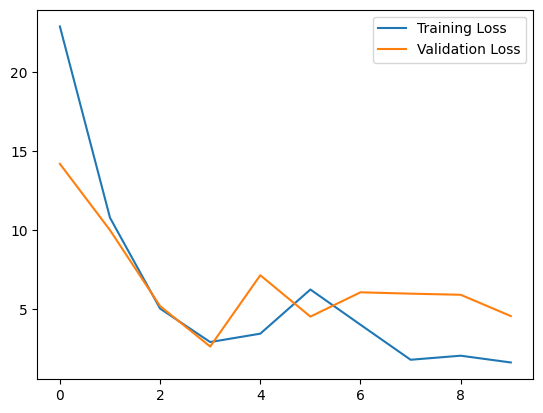

Training Accuracy: [0.6633663177490234, 0.7425742745399475, 0.7871286869049072, 0.8168317079544067, 0.7772276997566223, 0.6881188154220581, 0.7574257254600525, 0.8861386179924011, 0.8514851331710815, 0.8861386179924011]
Validation Accuracy: [0.8235294222831726, 0.8235294222831726, 0.843137264251709, 0.8627451062202454, 0.5686274766921997, 0.7254902124404907, 0.8627451062202454, 0.8627451062202454, 0.7058823704719543, 0.7254902124404907]


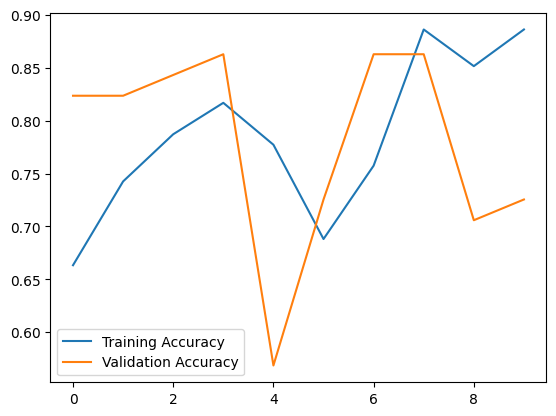

2/2 [==============================] - 3s 549ms/step
Confusion Matrix:
[[17  3]
 [11 20]]


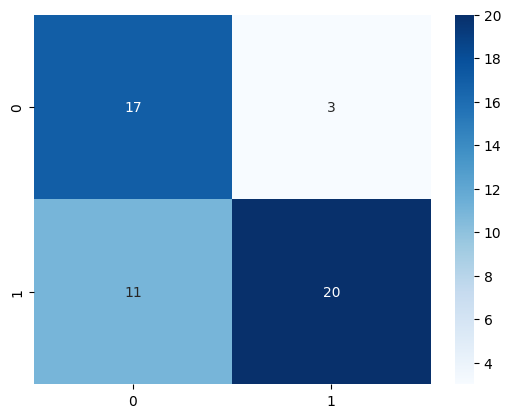

        Loss  Accuracy   Val_Loss  Val_Accuracy
0  22.865252  0.663366  14.186149      0.823529
1  10.781154  0.742574   9.997444      0.823529
2   5.041783  0.787129   5.198893      0.843137
3   2.928478  0.816832   2.643846      0.862745
4   3.458027  0.777228   7.149113      0.568627
5   6.248208  0.688119   4.535604      0.725490
6   4.022126  0.757426   6.071497      0.862745
7   1.809947  0.886139   5.985465      0.862745
8   2.065731  0.851485   5.914838      0.705882
9   1.637829  0.886139   4.570369      0.725490


In [4]:
# Train the model and save the history
history = inception.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_val, Y_val))

# Print the loss function
print("Loss function:", history.history['loss'])

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Print the training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
print("Training Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)

# Plot the training and validation accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

# Calculate the confusion matrix for the validation set
Y_pred = inception.predict(X_val)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_val_classes = np.argmax(Y_val, axis=1)
cm = confusion_matrix(Y_val_classes, Y_pred_classes)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.show()

# Create a table showing the training and validation loss and accuracy
results_df = pd.DataFrame({'Loss': history.history['loss'], 'Accuracy': history.history['accuracy'],
                           'Val_Loss': history.history['val_loss'], 'Val_Accuracy': history.history['val_accuracy']})
print(results_df)

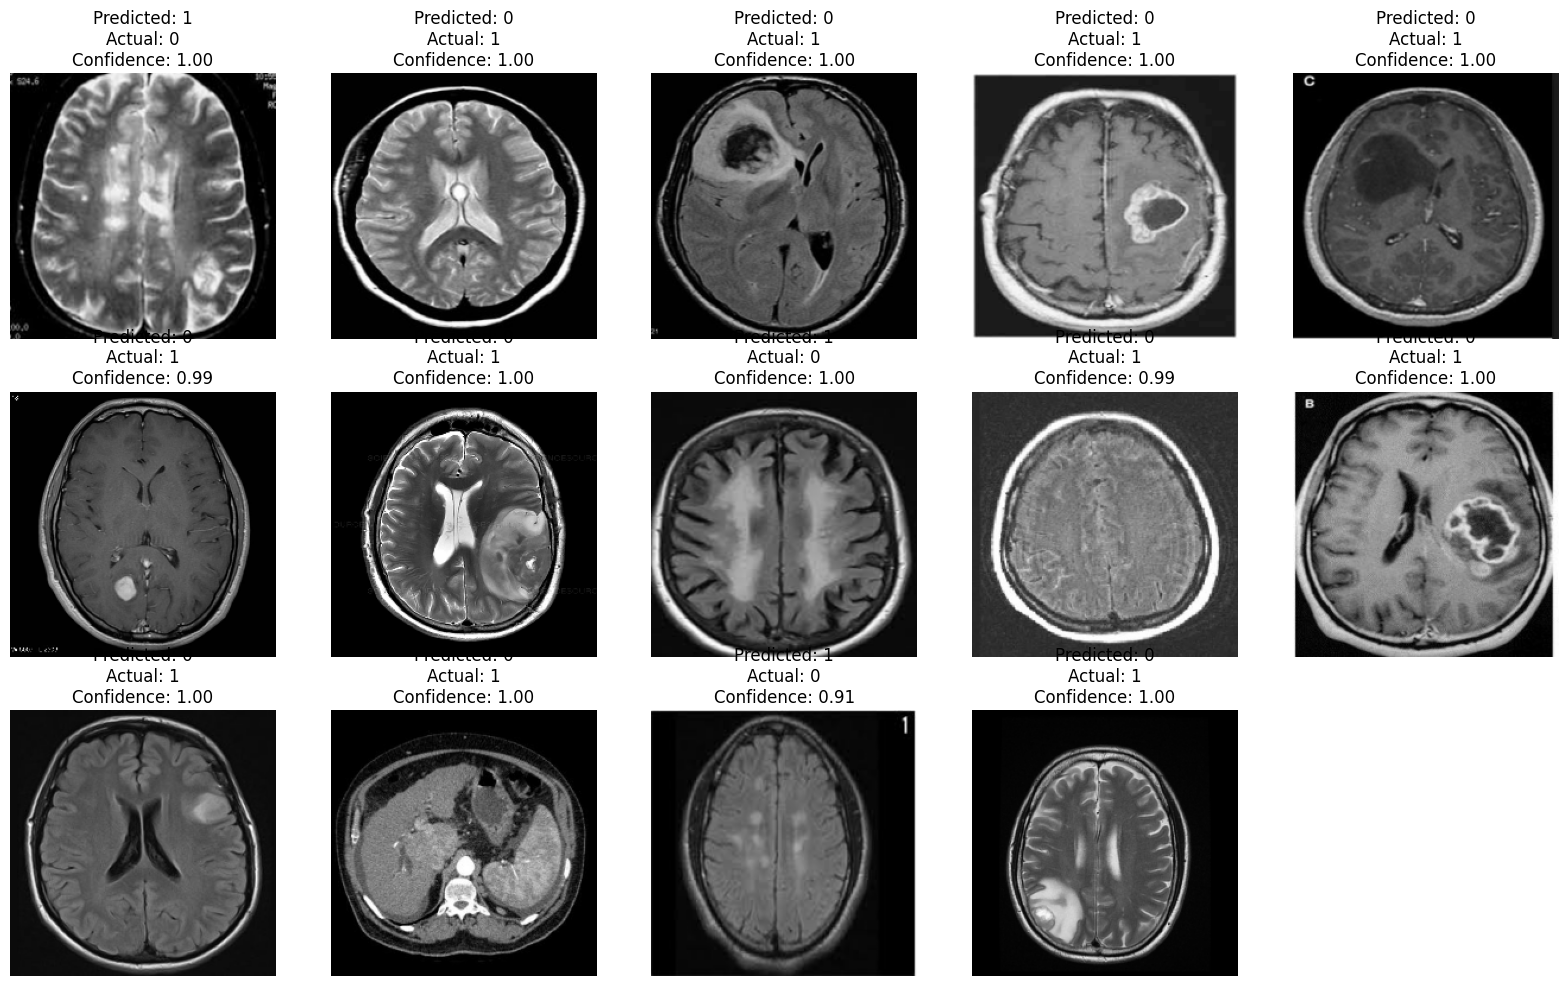

In [5]:
# Get the indices and confidence scores of the misclassified images
misclassified_indices = np.where(Y_pred_classes != Y_val_classes)[0]
misclassified_confidence = np.max(Y_pred[misclassified_indices], axis=1)

# Plot the misclassified images with confidence scores
plt.figure(figsize=(20, 20))
for i, index in enumerate(misclassified_indices[:25]):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_val[index])
    plt.axis('off')
    plt.title('Predicted: %s\nActual: %s\nConfidence: %.2f' % (Y_pred_classes[index], Y_val_classes[index], misclassified_confidence[i]))

plt.show()

Epoch 1/10
7/7 [==============================] - 17s 2s/step - loss: 2.0510 - accuracy: 0.6238 - val_loss: 1.0593 - val_accuracy: 0.6471
Epoch 2/10
7/7 [==============================] - 13s 2s/step - loss: 0.6140 - accuracy: 0.7574 - val_loss: 0.3312 - val_accuracy: 0.9020
Epoch 3/10
7/7 [==============================] - 13s 2s/step - loss: 0.4401 - accuracy: 0.8119 - val_loss: 0.4197 - val_accuracy: 0.8627
Epoch 4/10
7/7 [==============================] - 13s 2s/step - loss: 0.3999 - accuracy: 0.8515 - val_loss: 0.3174 - val_accuracy: 0.8824
Epoch 5/10
7/7 [==============================] - 13s 2s/step - loss: 0.4146 - accuracy: 0.8416 - val_loss: 0.3703 - val_accuracy: 0.9020
Epoch 6/10
7/7 [==============================] - 13s 2s/step - loss: 0.3700 - accuracy: 0.8564 - val_loss: 0.2837 - val_accuracy: 0.9216
Epoch 7/10
7/7 [==============================] - 13s 2s/step - loss: 0.2526 - accuracy: 0.8911 - val_loss: 0.3158 - val_accuracy: 0.9020
Epoch 8/10
7/7 [==================

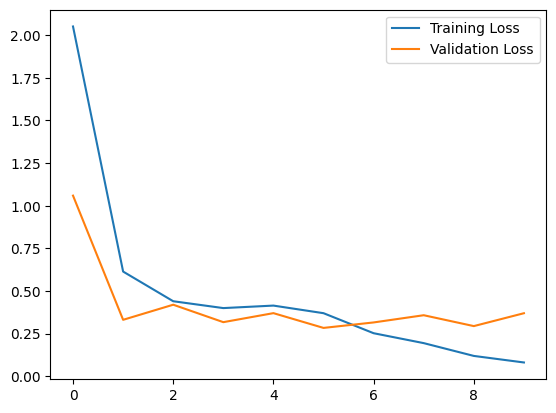

Training Accuracy: [0.6237623691558838, 0.7574257254600525, 0.8118811845779419, 0.8514851331710815, 0.8415841460227966, 0.8564356565475464, 0.8910890817642212, 0.905940592288971, 0.9504950642585754, 0.9752475023269653]
Validation Accuracy: [0.6470588445663452, 0.9019607901573181, 0.8627451062202454, 0.8823529481887817, 0.9019607901573181, 0.9215686321258545, 0.9019607901573181, 0.9019607901573181, 0.9019607901573181, 0.9019607901573181]


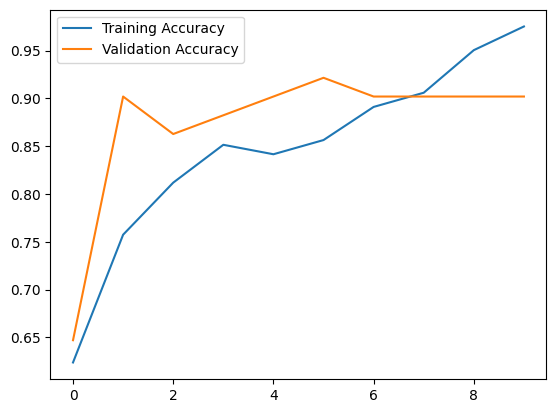

2/2 [==============================] - 4s 974ms/step
Confusion Matrix:
[[16  4]
 [ 1 30]]


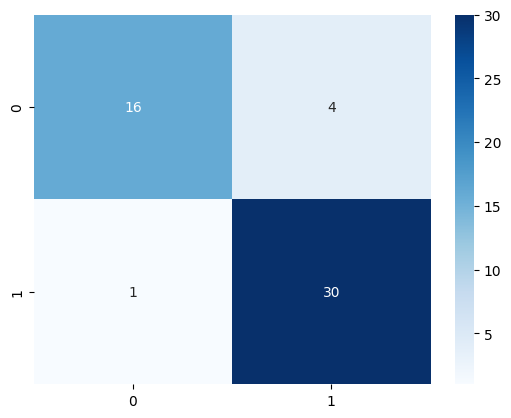

       Loss  Accuracy  Val_Loss  Val_Accuracy
0  2.051003  0.623762  1.059275      0.647059
1  0.614038  0.757426  0.331202      0.901961
2  0.440097  0.811881  0.419723      0.862745
3  0.399925  0.851485  0.317439      0.882353
4  0.414582  0.841584  0.370286      0.901961
5  0.370016  0.856436  0.283714      0.921569
6  0.252590  0.891089  0.315782      0.901961
7  0.194513  0.905941  0.358089      0.901961
8  0.119481  0.950495  0.294339      0.901961
9  0.081044  0.975248  0.369859      0.901961


In [6]:
# Train the model and save the history
history = resnet.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_val, Y_val))

# Print the loss function
print("Loss function:", history.history['loss'])

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Print the training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
print("Training Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)

# Plot the training and validation accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

# Calculate the confusion matrix for the validation set
Y_pred = resnet.predict(X_val)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_val_classes = np.argmax(Y_val, axis=1)
cm = confusion_matrix(Y_val_classes, Y_pred_classes)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.show()

# Create a table showing the training and validation loss and accuracy
results_df = pd.DataFrame({'Loss': history.history['loss'], 'Accuracy': history.history['accuracy'],
                           'Val_Loss': history.history['val_loss'], 'Val_Accuracy': history.history['val_accuracy']})
print(results_df)

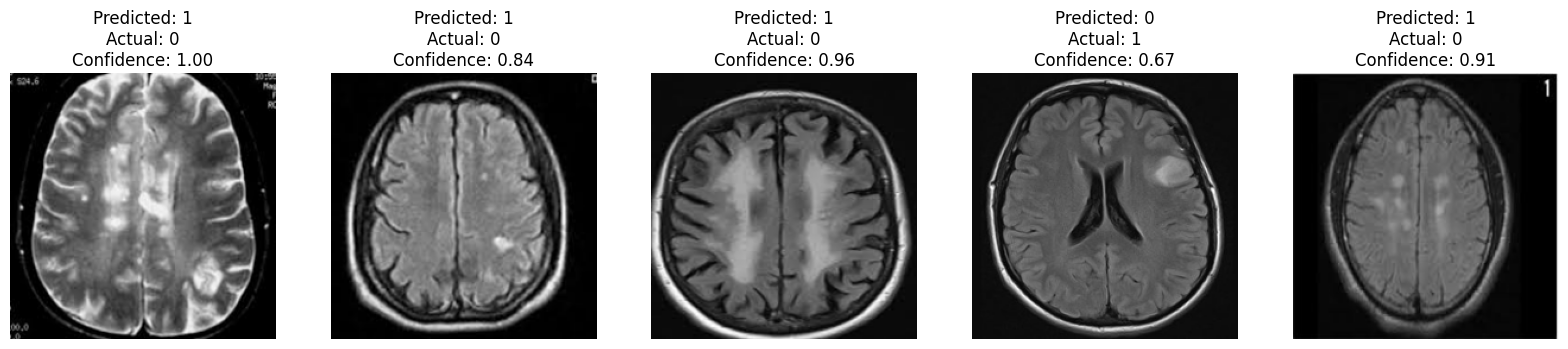

In [7]:
# Get the indices and confidence scores of the misclassified images
misclassified_indices = np.where(Y_pred_classes != Y_val_classes)[0]
misclassified_confidence = np.max(Y_pred[misclassified_indices], axis=1)

# Plot the misclassified images with confidence scores
plt.figure(figsize=(20, 20))
for i, index in enumerate(misclassified_indices[:25]):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_val[index])
    plt.axis('off')
    plt.title('Predicted: %s\nActual: %s\nConfidence: %.2f' % (Y_pred_classes[index], Y_val_classes[index], misclassified_confidence[i]))

plt.show()